<a href="https://colab.research.google.com/github/ChristopMD/Machine-Learning/blob/main/Naive%20Bayes/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as ss
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn import svm

##Dataset

In [ ]:
data = pd.read_csv('Social_Network_Ads.csv')

In [ ]:
data.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
data.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

##Visualization

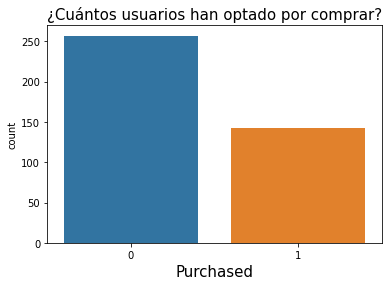

In [ ]:
sns.countplot(data = data, x = 'Purchased')
plt.xlabel('Purchased', fontsize = 15)
plt.title('¿Cuántos usuarios han optado por comprar?', fontsize = 15)
plt.show()

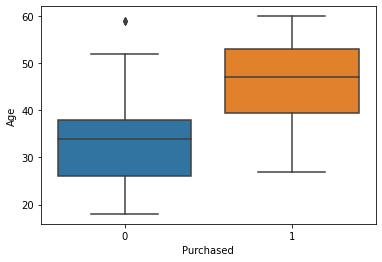

In [ ]:
sns.boxplot(x='Purchased',y='Age',data=data)
plt.show()

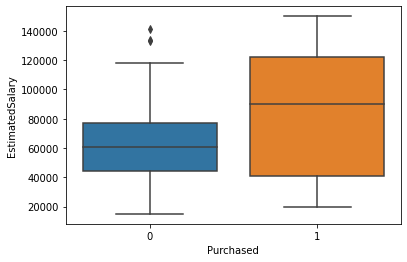

In [ ]:
sns.boxplot(x='Purchased',y='EstimatedSalary',data=data)
plt.show()

Gender     Female  Male
Purchased              
0             127   130
1              77    66


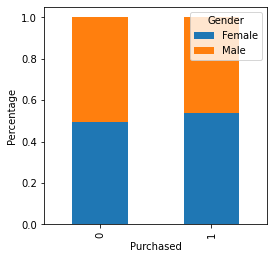

In [ ]:
print(pd.crosstab(data["Purchased"],data["Gender"]))
Gender = pd.crosstab(data["Purchased"],data["Gender"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Purchased")
plt.ylabel("Percentage")
plt.show()

In [ ]:
X = data.iloc[:, [2, 3]].values
y = data.iloc[:, -1].values

In [ ]:
X[0:5]

array([[   19, 19000],
       [   35, 20000],
       [   26, 43000],
       [   27, 57000],
       [   19, 76000]])

In [ ]:
y[0:5]

array([0, 0, 0, 0, 0])

##Split Dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
#Data normalization
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

##Naive Bayes Classifier

In [ ]:
#Se crea el modelo con la base de datos de entrenamiento
classifier = GaussianNB().fit(X_train, y_train)

In [ ]:
#Muesstra de validación(preddicion)
y_pred = classifier.predict(X_test)

In [ ]:
y_pred[0:5]

array([0, 0, 0, 0, 0])

In [ ]:
y_test[0:5]

array([0, 0, 0, 0, 0])

In [ ]:
confusion_matrix(y_test, y_pred)

array([[56,  2],
       [ 4, 18]])

##Confusion Matrix

Confusion matrix, without normalization
[[56  2]
 [ 4 18]]
Normalized confusion matrix
[[0.96551724 0.03448276]
 [0.18181818 0.81818182]]


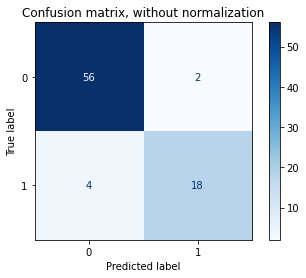

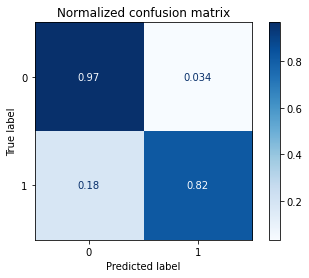

In [ ]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 #display_labels=y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

De 100 clientes que han comprado el modelo identifica a 82

De 100 clientes que No han comprado el modelo identifica a 97

In [1]:
#Sensibilidad: 82% -> De 100 clientes que han comprado el modelo identifica a 82
#Especificidad: 97% -> De 100 clientes que No han comprado el modelo identifica a 97

In [ ]:
y_pred_prob = classifier.predict_proba(X_test)

In [ ]:
y_pred_prob[0:5]

array([[0.89147043, 0.10852957],
       [0.84097849, 0.15902151],
       [0.85177346, 0.14822654],
       [0.91910807, 0.08089193],
       [0.89836193, 0.10163807]])

In [ ]:
y_pred_prob[0:5,1]

array([0.10852957, 0.15902151, 0.14822654, 0.08089193, 0.10163807])

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob[:,1])

In [ ]:
#Curva roc tambien se usa para decidir que modelo usar
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9843260188087775

##Roc Curve

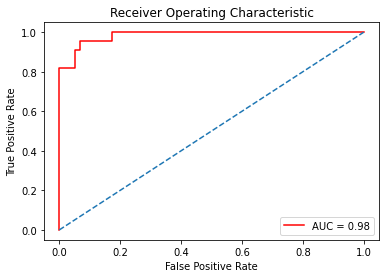

In [ ]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
dataf = pd.concat([pd.DataFrame(X_test),pd.DataFrame(y_test),pd.DataFrame(y_pred),pd.DataFrame(y_pred_prob)],axis=1)

In [ ]:
dataf.head(5)

,0,1,0,0,0,1
0,30,87000,0,0,0.891470,0.108530
1,38,50000,0,0,0.840978,0.159022
2,35,75000,0,0,0.851773,0.148227
3,30,79000,0,0,0.919108,0.080892
4,35,50000,0,0,0.898362,0.101638


##Prediction Table

In [ ]:
dataf.columns = ['Age', 'EstimatedSalary', 'Purchased', 'Purchased_Pred', 'Purchased_Pred_Prob_0', 'Purchased_Pred_Prob_1']

In [ ]:
dataf.head(10)

,Age,EstimatedSalary,Purchased,Purchased_Pred,Purchased_Pred_Prob_0,Purchased_Pred_Prob_1
0,30,87000,0,0,0.891470,0.108530
1,38,50000,0,0,0.840978,0.159022
2,35,75000,0,0,0.851773,0.148227
3,30,79000,0,0,0.919108,0.080892
4,35,50000,0,0,0.898362,0.101638
5,27,20000,0,0,0.954340,0.045660
6,31,15000,0,0,0.904144,0.095856
7,36,144000,1,1,0.035569,0.964431
8,18,68000,0,0,0.989188,0.010812
9,47,43000,0,0,0.502816,0.497184


Priorizar la canpaña hacia las personas que tengan mas probabilidad de comprar "1"